In [1]:
# This code file is about proposing simple classification NN for popular MNIST dataset

In [2]:
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("The MNIST database has a training set of %d examples." % len(X_train))
print("The MNIST database has a test set of %d examples." % len(X_test))

The MNIST database has a training set of 60000 examples.
The MNIST database has a test set of 10000 examples.


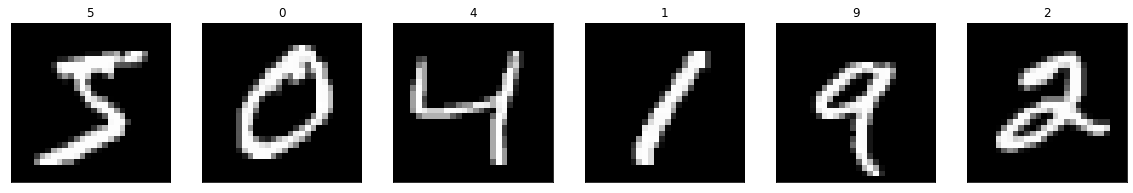

In [3]:
# visualization


import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm
import numpy as np


fig = plt.figure(figsize=(20,20))
for i in range(6):
    ax = fig.add_subplot(1,6, i+1, xticks = [], yticks = [])
    ax.imshow(X_train[i], cmap='gray')
    ax.set_title(str(y_train[i]))

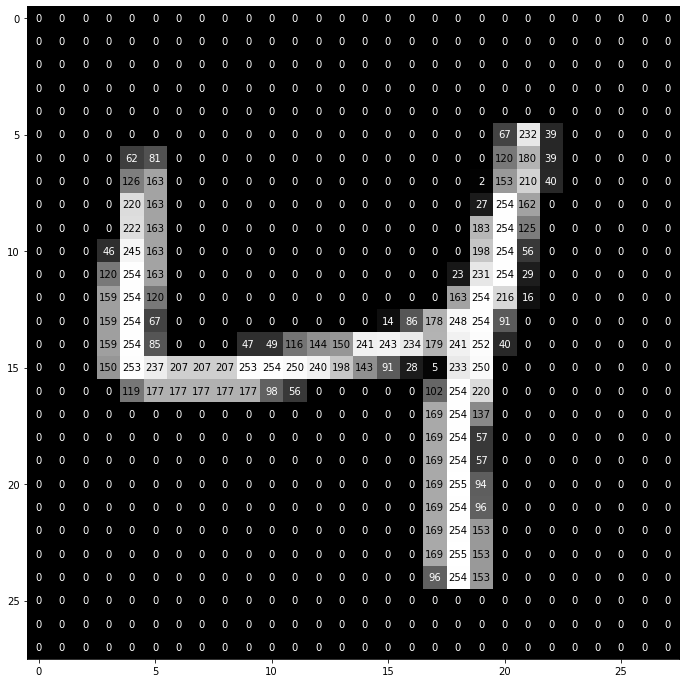

In [4]:
# view an image 

def visualize_input(img,ax):
    ax.imshow(img, cmap='gray')
    width, height = img.shape
    thresh = img.max()/2.5
    for x in range(width):
        for y in range(height):
            ax.annotate(str(round(img[x][y],2)), xy=(y,x),
                       horizontalalignment = 'center',
                       verticalalignment = 'center',
                       color = 'white' if img[x][y]<thresh else 'black')

fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(111)
visualize_input(X_train[2], ax)

In [5]:
# rescaling

X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

In [6]:
# Encode Categorical Integer Labels Using a One-Hot scheme
from keras.utils import np_utils

print('integer valued labels:')
print(y_train[:10])

# one-hot encode the labels
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)


# print first ten (on-hot) training labels
print('One-hot labels:')
print(y_train[:10])

integer valued labels:
[5 0 4 1 9 2 1 3 1 4]
One-hot labels:
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [7]:
# define the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten

model = Sequential()
model.add(Flatten(input_shape = X_train.shape[1:]))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
____________________________________________________

In [8]:
model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics = ['accuracy'])

In [9]:
score = model.evaluate(X_test, y_test, verbose = 0)
accuracy = 100*score[1]

print('Test accuracy: %.4f%%' % accuracy)

Test accuracy: 14.8800%


In [10]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath='mnist_model_MLP_best.hdf5', 
                               verbose=1, save_best_only=True)

history = model.fit(X_train, y_train, batch_size=256, epochs=20,
                    validation_split=0.2, callbacks=[checkpointer],
                    verbose=1, shuffle=True)

Epoch 1/20
188/188 [==============================] - 1s 4ms/step - loss: 0.8197 - accuracy: 0.7449 - val_loss: 0.2866 - val_accuracy: 0.9178

Epoch 00001: val_loss improved from inf to 0.28662, saving model to mnist_model_MLP_best.hdf5
Epoch 2/20
188/188 [==============================] - 1s 4ms/step - loss: 0.3929 - accuracy: 0.8852 - val_loss: 0.2180 - val_accuracy: 0.9375

Epoch 00002: val_loss improved from 0.28662 to 0.21802, saving model to mnist_model_MLP_best.hdf5
Epoch 3/20
188/188 [==============================] - 1s 4ms/step - loss: 0.3155 - accuracy: 0.9079 - val_loss: 0.1819 - val_accuracy: 0.9477

Epoch 00003: val_loss improved from 0.21802 to 0.18192, saving model to mnist_model_MLP_best.hdf5
Epoch 4/20
188/188 [==============================] - 1s 4ms/step - loss: 0.2720 - accuracy: 0.9204 - val_loss: 0.1632 - val_accuracy: 0.9523

Epoch 00004: val_loss improved from 0.18192 to 0.16316, saving model to mnist_model_MLP_best.hdf5
Epoch 5/20
188/188 [====================

In [11]:
model.load_weights('mnist_model_MLP_best.hdf5')

In [12]:
score = model.evaluate(X_test, y_test, verbose=0)
accuracy = 100*score[1]

print('Test accuracy: %.4f%%' % accuracy)

Test accuracy: 97.0300%
